# Import Library

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [5]:
# Daftar file Excel
file_paths = [
    '/content/drive/MyDrive/Dataset/Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman di Kabupaten Sukabumi, 2018.xlsx',
    '/content/drive/MyDrive/Dataset/Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman di Kabupaten Sukabumi, 2019.xlsx',
    '/content/drive/MyDrive/Dataset/Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman di Kabupaten Sukabumi, 2020.xlsx',
    '/content/drive/MyDrive/Dataset/Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman di Kabupaten Sukabumi, 2021.xlsx',
    '/content/drive/MyDrive/Dataset/Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman di Kabupaten Sukabumi, 2022.xlsx',
    '/content/drive/MyDrive/Dataset/Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman di Kabupaten Sukabumi, 2023.xlsx',
    '/content/drive/MyDrive/Dataset/Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman di Kabupaten Sukabumi, 2024.xlsx'
]

In [6]:
# List untuk menyimpan DataFrame
dataframes = []

# Load setiap file Excel ke dalam DataFrame dan tambahkan ke list
for file_path in file_paths:
    try:
        df = pd.read_excel(file_path)
        dataframes.append(df)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

In [7]:
# Menggabungkan beberapa data
df_combined = pd.concat(dataframes, ignore_index=True)

# Preprocessing

In [8]:
# Cek duplicate value
df_combined.duplicated().sum()

np.int64(48)

In [9]:
# Cek missing value
df_combined.isnull().sum()

,0
Jenis Tanaman,3
Produksi Tanaman Sayuran dan Buah-Buahan Semusim,33


In [10]:
# Menghapus missing value
df_combined = df_combined.dropna()

In [11]:
# Cek missing value
df_combined.isnull().sum()

,0
Jenis Tanaman,0
Produksi Tanaman Sayuran dan Buah-Buahan Semusim,0


In [12]:
# Menghapus duplicate value
df_combined = df_combined.drop_duplicates()

In [13]:
# Mengubah angka menjadi 0
df_combined["Produksi Tanaman Sayuran dan Buah-Buahan Semusim"] = pd.to_numeric(
    df_combined["Produksi Tanaman Sayuran dan Buah-Buahan Semusim"], errors='coerce'
)

df_combined["Produksi Tanaman Sayuran dan Buah-Buahan Semusim"] = df_combined["Produksi Tanaman Sayuran dan Buah-Buahan Semusim"].fillna(0).astype(int)

duplikat = df_combined.duplicated().sum()
print(f"Jumlah data duplikat: {duplikat}")

Jumlah data duplikat: 1


In [14]:
# Menampilkan missing value
missing_values = df_combined.isnull().sum()
print(missing_values)

Jenis Tanaman                                       0
Produksi Tanaman Sayuran dan Buah-Buahan Semusim    0
dtype: int64


In [15]:
# Menampilkan duplicate value
duplicates = df_combined.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 1


In [16]:
# Menampilkan data yang sudah di preprocessing
df_combined.head(20)

,Jenis Tanaman,Produksi Tanaman Sayuran dan Buah-Buahan Semusim
0,Bawang Daun/Scallion(kw/qui),54358
1,Bawang Merah/Shallots(kw/qui),9280
2,Bawang Putih/Garlic(kw/qui),40
3,Bayam/Spinach(kw/qui),1304
4,Blewah/Blewah(kw/qui),0
5,Buncis/string bean(kw/qui),97440
6,Cabai Besar/Chili/Big chili(kw/qui),0
7,Cabai Rawit/Chili/Cayenne Pepper(kw/qui),95148
8,Jamur/Mushrooms(kg),0
9,Kacang Merah/Red Beans(kw/qui),0


In [17]:
# Daftar tanaman yang ingin diprediksi
daftar_tanaman = ['Bawang Daun/Scallion (kw/qui)',
                  'Bawang Merah/Shallots (kw/qui)',
                  'Bawang Putih/Garlic (kw/qui)',
                  'Bayam/Spinach (kw/qui)',
                  'Buncis/string bean (kw/qui)',
                  'Cabai Rawit/Chili/Cayenne Pepper (kw/qui)',
                  'Kacang Panjang/Long Beans (kw/qui)',
                  'Kangkung/Water Spinach (kw/qui)',
                  'Kembang Kol/Cauliflower (kw/qui)',
                  'Kentang/Potato (kw/qui)',
                  'Ketimun/Cucumber (kw/qui)',
                  'Kubis/Cabbage (kw/qui)',
                  'Labu Siam/Chayote (kw/qui)',
                  'Melon/Melon (kw/qui)',
                  'Paprika/Bell Pepper (kw/qui)',
                  'Petsai/Sawi/Chinese Cabbage/mustard green (kw/qui)',
                  'Semangka/Watermelon (kw/qui)',
                  'Stroberi/Strawberry (kw/qui)',
                  'Terung/Eggplant (kw/qui)',
                  'Tomat/Tomato (kw/qui)',
                  'Wortel/Carrot (kw/qui)',
                  'Cabai Besar/TW/Teropong / Chili/Big chili (kw/qui)',
                  'Cabai Keriting/Chili/Curly chili(kw/qui)',
                  'Jamur Tiram/King Oyster Mushroom (kw/qui)',
                  'Jamur Merang/Straw Mushroom (kw/qui)',
                  'Jamur Lainnya/Mushroom (kw/qui)'

                  ]

In [18]:
# Menentukan variabel fitur & target
X = df_combined[['Jenis Tanaman']]
y = df_combined['Produksi Tanaman Sayuran dan Buah-Buahan Semusim']

In [19]:
# Mengubah fitur kategori (Jenis Tanaman) menjadi bentuk numerik
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)
feature_names = encoder.get_feature_names_out(['Jenis Tanaman'])
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)

# Modeling Linear Regression

In [20]:
# Split train & test
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

In [21]:
# Modeling Linear Regression
model = LinearRegression()

In [22]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Prediksi
y_pred = model.predict(X_test)

# Visualisasi

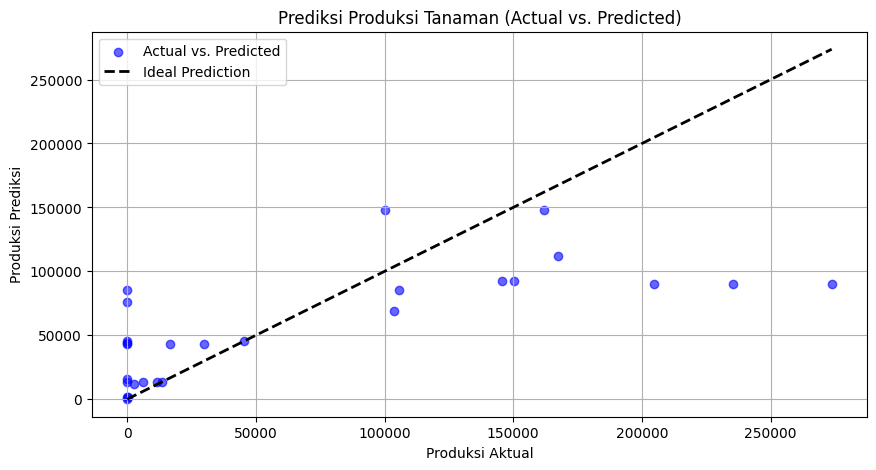

In [24]:
# Visualisasi Hasil (Actual vs. Predicted)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel("Produksi Aktual")
plt.ylabel("Produksi Prediksi")
plt.title("Prediksi Produksi Tanaman (Actual vs. Predicted)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi Model

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

MAE: 41218.17061728396
RMSE: 61446.88753272071
MSE: 3775719987.4588284
MAPE: inf
